In [ ]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.show()

The x-axis is the value of the variable just like in a histogram, but what exactly does the y-axis represent?

ANS-> The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.<br/>
If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.<br/>
So you need to take into account your bin width as well, i.e. compute the area under the curve and not just the sum of the bin heights. A density is scaled so that the area under the curve is 1, so no individual bin will ever be taller than 1 (the whole dataset). But kde is True by default and overrides norm_hist, so norm_hist changes the y-units only if you explicitly set kde to False:

In [3]:
import pandas as pd

# Read in data and examine first 10 rows
df = pd.read_excel("polar_dipoleMoment_pVDZ.xlsx")
# print(df)
print(df.head(10))
dipoleMoment = df['polarization']   # used, dipoleMoment istead of polarization
# link to this histogram: "https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0"

  PossibleOrientations  polarization  dipoleMoment
0             set_1111     17.980301      2.927005
1             set_1121     19.173037      2.922685
2             set_1131     18.545120      3.199705
3             set_1211     19.077113      2.769127
4             set_1221     19.490590      2.606520
5             set_1231     19.841212      2.627188
6             set_1311     19.497551      3.069778
7             set_1321     19.325293      3.224798
8             set_1331     19.317048      3.245971
9             set_1112     19.331877      2.613056


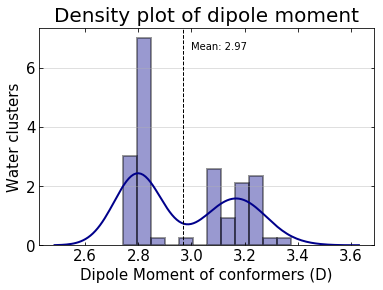

In [5]:
# Import the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

# matplotlib histogram
# for bins calc, max=3.374353039 and min=2.740364906, so bin_width= (3.37-2.74)/0.02 eq to 31.5
'''plt.hist(df['DipoleMoment'], color = 'blue', edgecolor = 'black',
         bins = int(0.63/0.05))'''

# seaborn histogram
'''sns.distplot(df['DipoleMoment'], hist=True, kde=False, 
             bins=int(0.63/0.05), color = 'blue', norm_hist = True,
             hist_kws={'edgecolor':'black'})'''
# Density Plot and Histogram of all arrival delays
sns.distplot(df['DipoleMoment'], norm_hist=True, kde=True,
             bins=int(0.63/0.05), color = 'darkblue',
             hist_kws={'edgecolor':'black', 'linewidth':2},
             kde_kws={'linewidth': 2})  # 'shade': True, argument to kde_kws

plt.axvline(dipoleMoment.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dipoleMoment.mean()*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(dipoleMoment.mean()))

# Add labels
plt.title('Density plot of dipole moment', fontsize=20)
plt.xlabel('Dipole Moment of conformers (D)', fontsize=15)
plt.ylabel('Water clusters', fontsize=15)
plt.grid(axis='y', alpha=0.5)
# plt.grid(False)
plt.legend(loc="best")
# Tick Parameters
plt.tick_params(axis='both', left='on', top='on', right='on',
                    bottom='on', labelleft='on', labeltop='off',
                    labelright='off', labelbottom='on', direction = 'in', which='major', labelsize=15)
# saving figure
#plt.savefig("densityplot_HF.png", bbox_inches="tight", dpi = 500)
plt.show()

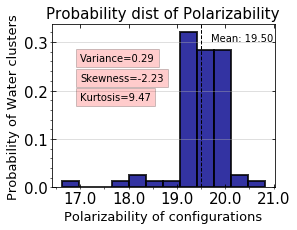

In [32]:
# Import the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import kurtosis
from scipy.stats import skew

# Set up the plot
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

# this histogram is based on probability
weights = np.ones_like(np.array(dipoleMoment))/float(len(np.array(dipoleMoment)))
plt.hist(dipoleMoment, weights=weights, bins = 12, color = 'darkblue', alpha = 0.8, edgecolor = 'black', linewidth=2)

plt.axvline(dipoleMoment.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dipoleMoment.mean()*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(dipoleMoment.mean()))
plt.text(17.0, 0.26, "Variance=%4.2f" % np.var(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
plt.text(17.0, 0.22, "Skewness=%4.2f" % skew(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
plt.text(17.0, 0.18, "Kurtosis=%4.2f" % kurtosis(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
# Add labels
plt.title('Probability dist of Polarizability', fontsize=15)
plt.xlabel('Polarizability of configurations', fontsize=13)
plt.ylabel('Probability of Water clusters', fontsize=13)

# y-axis set-up
# plt.ylim(0, 6)   # to manage x-axis, plt.xlim(3, 10)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(0.02))

# x-axis set-up
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

plt.grid(axis='y', alpha=0.5)
# Tick Parameters
plt.tick_params(axis='both', left='on', top='on', right='on',
                    bottom='on', labelleft='on', labeltop='off',
                    labelright='off', labelbottom='on', direction = 'in', which='major', labelsize=15)
# plt.grid('off') or plt.grid(False)
# saving figure
plt.savefig("probDist_B3LYP_pVDZ_polar.png", bbox_inches="tight", dpi = 500)
plt.show()

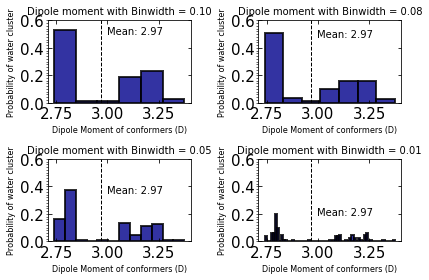

In [17]:
# Import the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.text(3.2, 0.35, "Variance=%4.2f" % np.var(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
plt.text(3.2, 0.31, "Skewness=%4.2f" % skew(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
plt.text(3.2, 0.27, "Kurtosis=%4.2f" % kurtosis(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2))
# Add labels
plt.title('Probability dist of dipole moment', fontsize=20)
plt.xlabel('Dipole Moment of conformers (D)', fontsize=15)
plt.ylabel('Water clusters', fontsize=15)
plt.grid(axis='y', alpha=0.5)

# Show 4 different binwidths
for i, binwidth in enumerate([0.1, 0.08, 0.05, 0.01]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    # this histogram is based on probability
    weights = np.ones_like(np.array(dipoleMoment))/float(len(np.array(dipoleMoment)))
    ax.hist(dipoleMoment, weights=weights, bins = int(0.63/binwidth), color = 'darkblue',
    alpha = 0.8, edgecolor = 'black', linewidth=2)
    plt.axvline(dipoleMoment.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(dipoleMoment.mean()*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(dipoleMoment.mean()))
    
    # Title and labels
    plt.title('Dipole moment with Binwidth = %4.2f' % binwidth, size = 10)
    plt.xlabel('Dipole Moment of conformers (D)', size = 8)
    plt.ylabel('Probability of water cluster', size = 8)
    plt.ylim(0, 0.6)   # to manage x-axis, plt.xlim(3, 10)
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(0.02))

    # Tick Parameters
    plt.tick_params(axis='both', left='on', top='on', right='on',
    bottom='on', labelleft='on', labeltop='off',
    labelright='off', labelbottom='on', direction = 'in', which='major', labelsize=15)


plt.tight_layout()
plt.savefig("HF_coll.png", bbox_inches="tight", dpi = 500)
plt.show()

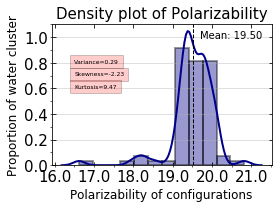

In [31]:
# Import the libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# Set up the plot
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
    
# Density Plot and Histogram of all dipole moments
binwidth = 0.05
sns.distplot(df['polarization'], norm_hist=True, kde=True,
    bins=int(0.63/binwidth), color = 'darkblue',
    hist_kws={'edgecolor':'black', 'linewidth':2},
    kde_kws={'linewidth': 2})  # 'shade': True, argument to kde_kws

plt.axvline(dipoleMoment.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dipoleMoment.mean()*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(dipoleMoment.mean()))

plt.text(16.5, 0.8, "Variance=%4.2f" % np.var(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2), fontsize=6)
plt.text(16.5, 0.7, "Skewness=%4.2f" % skew(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2), fontsize=6)
plt.text(16.5, 0.6, "Kurtosis=%4.2f" % kurtosis(dipoleMoment), bbox=dict(facecolor='red', alpha=0.2), fontsize=6)
    
# Title and labels
# plt.title('Density plot with Binwidth = %4.2f' % binwidth, size = 15)
plt.title('Density plot of Polarizability', size= 15)
plt.xlabel('Polarizability of configurations', size = 12)
plt.ylabel('Proportion of water cluster', size = 12)

# y-axis set-up
# plt.ylim(0, 6)   # to manage x-axis, plt.xlim(3, 10)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# x-axis set-up
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

# Tick Parameters*
plt.tick_params(axis='both', left='on', top='on', right='on',
    bottom='on', labelleft='on', labeltop='off',
    labelright='off', labelbottom='on', direction = 'in', which='major', labelsize=15)
plt.grid(axis='y', alpha=0.5)


plt.tight_layout()
plt.savefig("densityPlot_B3LY_pVDZ_polar.png", bbox_inches="tight", dpi = 500)
plt.show()